<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Satellite Image Data <br><br><br>Analysis using numpy</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Data Source: Satellite Image from WIFIRE Project</p>


WIFIRE is an integrated system for wildfire analysis, with specific regard to changing urban dynamics and climate. The system integrates networked observations such as heterogeneous satellite data and real-time remote sensor data, with computational techniques in signal processing, visualization, modeling, and data assimilation to provide a scalable method to monitor such phenomena as weather patterns that can help predict a wildfire's rate of spread. You can read more about WIFIRE at: https://wifire.ucsd.edu/

In this example, we will analyze a sample satellite image dataset from WIFIRE using the numpy Library.


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Loading the libraries we need: numpy, scipy, matplotlib</p>

In [76]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Creating a numpy array from an image file:</p> 

<br>
Lets choose a WIFIRE satellite image file as an ndarray and display its type.


In [77]:
from skimage import data
import imageio
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

type(photo_data)


imageio.core.util.Image

Let's see what is in this image. 

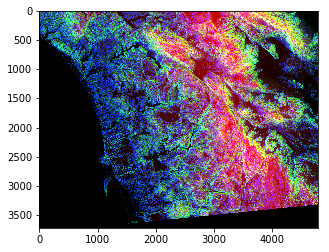

In [78]:
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

In [79]:
photo_data.shape

print(photo_data)

[[[  0  22  35]
  [  0  11  57]
  [ 19  32 128]
  ...
  [ 19  21  98]
  [  0   6  28]
  [  0  19   0]]

 [[ 30  64 109]
  [ 29  46 128]
  [ 25  33 157]
  ...
  [  1   5  50]
  [  0   5  34]
  [  0   4  28]]

 [[ 23  57 155]
  [ 16  35 174]
  [ 15  24 189]
  ...
  [  0   5   9]
  [  0   5  34]
  [  0   2  69]]

 ...

 [[  2   0   1]
  [  2   0   1]
  [  2   0   1]
  ...
  [  2   0   1]
  [  2   0   1]
  [  2   0   1]]

 [[  2   0   1]
  [  2   0   1]
  [  2   0   1]
  ...
  [  2   0   1]
  [  2   0   1]
  [  2   0   1]]

 [[  2   0   1]
  [  2   0   1]
  [  2   0   1]
  ...
  [  2   0   1]
  [  2   0   1]
  [  2   0   1]]]


The shape of the ndarray show that it is a three layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green and Blue.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
RGB Color Mapping in the Photo:</p> <br>
<ul>
<li><p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold">
RED pixel indicates Altitude</p>
<li><p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold">
BLUE pixel indicates Aspect
</p>
<li><p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold">
GREEN pixel indicates Slope
</p>
</ul>
<br>
The higher values denote higher altitude, aspect and slope.


In [80]:
photo_data.size

53606475

In [81]:
photo_data.min(), photo_data.max()

(0, 255)

In [82]:
photo_data.mean()

75.8299354508947

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Pixel on the 150th Row and 250th Column</p>

In [83]:
photo_data[150, 250]

Image([ 17,  35, 255], dtype=uint8)

In [84]:
photo_data[150, 250, 1]

35

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Set a Pixel to All Zeros</p>
<br/>
We can set all three layer in a pixel as once by assigning zero globally to that (row,column) pairing. However, setting one pixel to zero is not noticeable.

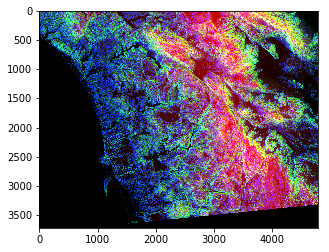

In [85]:
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

photo_data[150, 250] = 0
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Changing colors in a Range<p/>
<br/>
We can also use a range to change the pixel values. As an example, let's set the green layer for rows 200 t0 800 to full intensity.

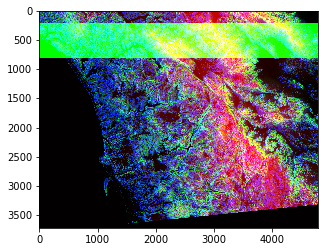

In [86]:
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

photo_data[200:800, : ,1] = 255
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

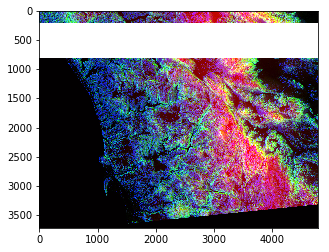

In [87]:
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

photo_data[200:800, :] = 255
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

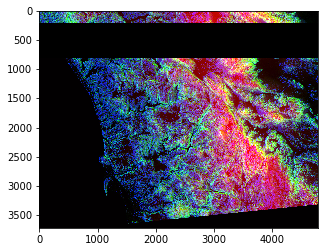

In [88]:
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

photo_data[200:800, :] = 0
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Pick all Pixels with Low Values</p>

In [89]:
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

print("Shape of photo_data:", photo_data.shape)
low_value_filter = photo_data < 200
print("Shape of low_value_filter:", low_value_filter.shape)

Shape of photo_data: (3725, 4797, 3)
Shape of low_value_filter: (3725, 4797, 3)


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Filtering Out Low Values</p><br/>
Whenever the low_value_filter is True, set value to 0.

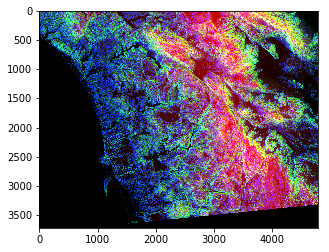

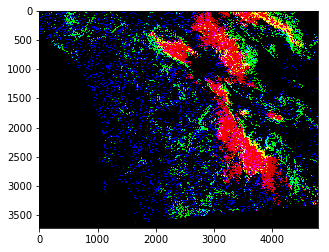

In [90]:
#import random
plt.figure(figsize=(5,5))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
More Row and Column Operations</p><br>
You can design complex patters by making cols a function of rows or vice-versa. Here we try a linear relationship between rows and columns.

In [91]:
rows_range = np.arange(len(photo_data))
cols_range = rows_range
print(type(rows_range))

<class 'numpy.ndarray'>


In [92]:
photo_data[rows_range, cols_range] = 255

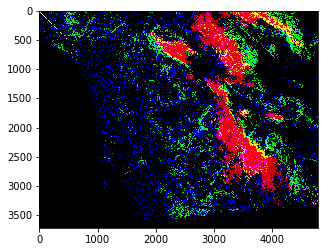

In [93]:
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Masking Images</p>
<br>Now let us try something even cooler...a mask that is in shape of a circular disc.

<img src="./1494532821.png" align="left"/>

In [94]:
total_rows, total_cols, total_layers = photo_data.shape
print("photo_data = ", photo_data.shape)

X, Y = np.ogrid[:total_rows, :total_cols]
print("X = ", X.shape, " and Y = ", Y.shape)

photo_data =  (3725, 4797, 3)
X =  (3725, 1)  and Y =  (1, 4797)


In [95]:
center_row, center_col = total_rows / 2, total_cols / 2
print("center_row = ", center_row, "AND center_col = ", center_col)
print()
print(X - center_row)
print()
print(Y - center_col)
print()

dist_from_center = (X - center_row)**2 + (Y - center_col)**2
print(dist_from_center)
print()

radius = (total_rows / 2)**2
print("Radius = ", radius)
print()

circular_mask = (dist_from_center > radius)
print(circular_mask)
print()
print(circular_mask[1500:1700,2000:2200])

center_row =  1862.5 AND center_col =  2398.5

[[-1862.5]
 [-1861.5]
 [-1860.5]
 ...
 [ 1859.5]
 [ 1860.5]
 [ 1861.5]]

[[-2398.5 -2397.5 -2396.5 ...  2395.5  2396.5  2397.5]]

[[9221708.5 9216912.5 9212118.5 ... 9207326.5 9212118.5 9216912.5]
 [9217984.5 9213188.5 9208394.5 ... 9203602.5 9208394.5 9213188.5]
 [9214262.5 9209466.5 9204672.5 ... 9199880.5 9204672.5 9209466.5]
 ...
 [9210542.5 9205746.5 9200952.5 ... 9196160.5 9200952.5 9205746.5]
 [9214262.5 9209466.5 9204672.5 ... 9199880.5 9204672.5 9209466.5]
 [9217984.5 9213188.5 9208394.5 ... 9203602.5 9208394.5 9213188.5]]

Radius =  3468906.25

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False

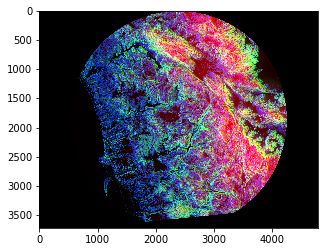

In [96]:
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

photo_data[circular_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Further Masking</p>
<br/>You can further improve the mask, for example just get upper half disc.

In [97]:
X, Y = np.ogrid[:total_rows, :total_cols]
half_upper = X < center_row # this line generates a mask for all rows above the center

half_upper_mask = np.logical_and(half_upper, circular_mask)

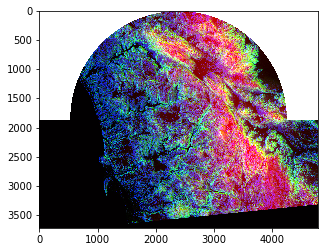

In [98]:
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

#photo_data[half_upper_mask] = 255
import random
photo_data[half_upper_mask] = random.randint(200,255)
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Further Processing of our Satellite Imagery </p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Processing of RED Pixels</p>

Remember that red pixels tell us about the height. Let us try to highlight all the high altitude areas. We will do this by detecting high intensity RED Pixels and muting down other areas.

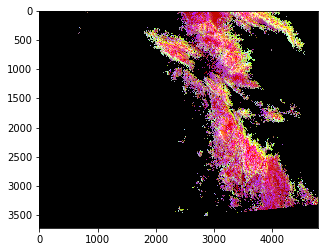

In [99]:
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

red_mask   = photo_data[:, : ,0] < 150

photo_data[red_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Detecting Highl-GREEN Pixels</p>

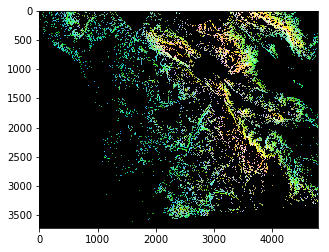

In [100]:
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

green_mask = photo_data[:, : ,1] < 150

photo_data[green_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Detecting Highly-BLUE Pixels</p>

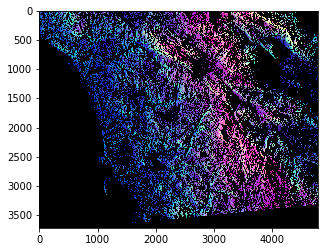

In [101]:
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

blue_mask  = photo_data[:, : ,2] < 150

photo_data[blue_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Composite mask that takes thresholds on all three layers: RED, GREEN, BLUE</p>

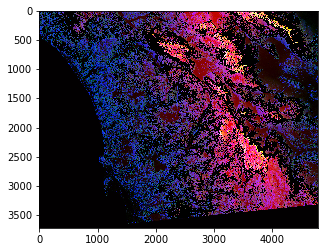

In [102]:
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data = imageio.imread('./wifire/sd-3layers.jpg')


red_mask   = photo_data[:, : ,0] < 250
green_mask = photo_data[:, : ,1] > 100
blue_mask  = photo_data[:, : ,2] < 100

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(photo_data)